<a href="https://colab.research.google.com/github/11carol/class_area/blob/develop/analise_espectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Espectral**

Nesse notebook será realizado teste de análise espectral, usando imagem do satélite Landsat 8

**Instalando a Biblioteca rasterio** é necessário essa ação por esta dentro no colab

In [1]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.2 MB/s 


**Importando as bibliotecas**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from pathlib import Path
import pickle

Chamando as bandas que serão usadas através do comando f'*_T1_{band}.TIF'

In [3]:
def load_landsat_image(img_folder, bands):
    image = {}
    path = Path(img_folder)
    for band in bands:
        # considering the landsat images end with *_SR_B#.TIF, we will use it to locate the correct file
        file = next(path.glob(f'*_T1_{band}.TIF'))
        print(f'Opening file {file}')
        ds = rasterio.open(file)
        image.update({band: ds.read(1)})

    return image

Através do caminho é dito quais as bandas que serão usadas

In [21]:
# load the image
img = load_landsat_image('/content/imagens', ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7'])
img.keys()


Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B1.TIF
Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B2.TIF
Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B3.TIF
Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B4.TIF
Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B5.TIF
Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B6.TIF
Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B7.TIF


dict_keys(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7'])

In [24]:
filename = 'img'
outfile = open(filename,'wb')

In [25]:
pickle.dump(img,outfile)
outfile.close()

In [31]:
infile = open(filename,'rb')
img = pickle.load(infile)
infile.close()

In [32]:
print(img)

{'B1': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), 'B2': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), 'B3': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), 'B4': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), 'B5': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 

o Shape mostra quais os valores das matrizes das imagens

In [23]:
img['B1'].shape, img['B2'].shape, img['B3'].shape,img['B4'].shape, img['B5'].shape, img['B6'].shape, img['B7'].shape

((7751, 7601),
 (7751, 7601),
 (7751, 7601),
 (7751, 7601),
 (7751, 7601),
 (7751, 7601),
 (7751, 7601))

Unindo as bandas através do np.stack formando sua composição

In [6]:
# stack the layers to create a cube
rgb = np.stack([img['B6'], img['B5'], img['B4']], axis=-1)

In [7]:
rgb = rgb/rgb.max() * 2


Abaixo será plotado apenas um pedaço da imagem, como mostra os comandos onde é recortada através no número de pixels da imagem, lembrando que a imagem ja esta composta RGB

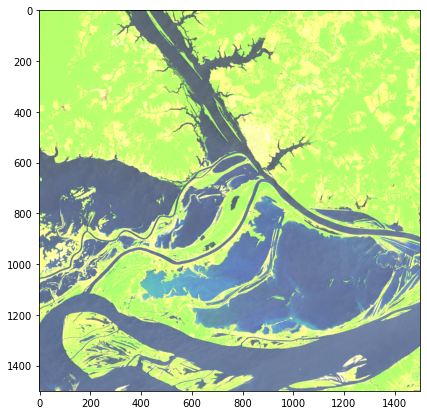

In [13]:
plt.figure(figsize=(7,7))
plt.imshow(rgb[4500:6000, 2000:3500, 0:3])

Aqui mostra qual pedaço que foi ampliado no plot acima

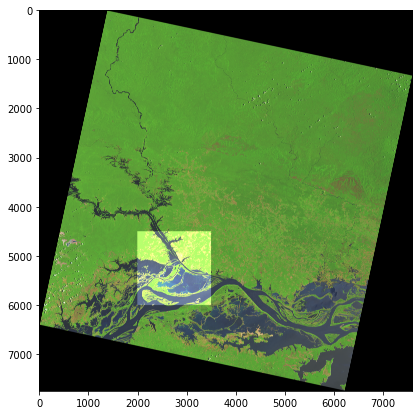

In [9]:
rgb[4500:6000, 2000:3500, 0:3] = rgb[4500:6000, 2000:3500, 0:3] * 2
plt.figure(figsize=(7,7))
plt.imshow(rgb)

Ocorrerá a normalização dos dados, onde os valores ==0 serão substituidos por nan

In [14]:
def normalized_difference(img, b1, b2, eps=0.0001):
    band1 = np.where((img[b1]==0) & (img[b2]==0), np.nan, img[b1])
    band2 = np.where((img[b1]==0) & (img[b2]==0), np.nan, img[b2])
    
    return (band1 - band2) / (band1 + band2)

Abaixo esta chamando bandas que serão usadas para verificar a normalização de água

In [15]:
img = load_landsat_image('/content/imagens', ['B3', 'B4', 'B5', 'B6'])

Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B3.TIF
Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B4.TIF
Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B5.TIF
Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B6.TIF


In [16]:
rgb = np.stack([img['B6'], img['B5'], img['B4']], axis=-1)
rgb = rgb/rgb.max() * 2

Ocorre a normalização d

In [17]:
mndwi = normalized_difference(img, 'B4', 'B6')

In [18]:
water_mask = mndwi > 0.0 
water_mask 

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [19]:
rgb[~water_mask] = 0

Abaixo é plotado imagem destacando água

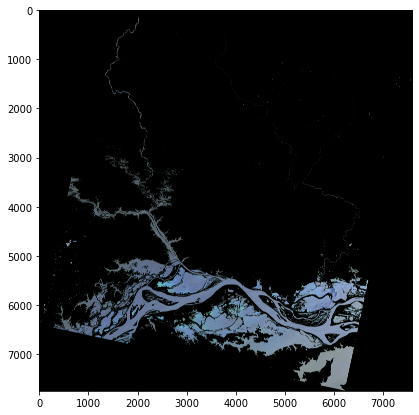

In [20]:
plt.figure(figsize=(7,7))
plt.imshow(rgb*2)

Assim como na imagem acima, após mascarado é plotado a imagem mostrando apenas a caracteristica água, porém com um tom mais destacado de azul

In [ ]:
rgb[water_mask] = [0.1, 0.1, 0.9]

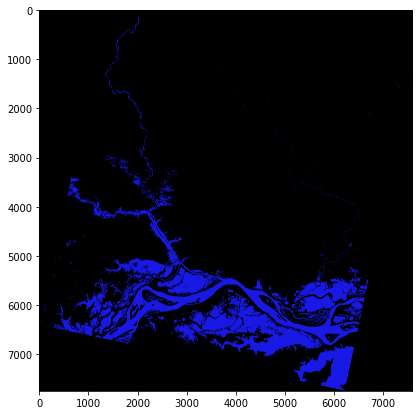

In [ ]:
plt.figure(figsize=(7,7))
plt.imshow(rgb)

Abaixo é criado uma lista com as bandas

In [ ]:
def stack_img(img, bands):
    # create a list of the band's arrays
    bands_arrays = [img[band] for band in bands]
    return np.stack(bands_arrays, axis=-1)

Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B2.TIF
Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B3.TIF
Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B4.TIF
Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B5.TIF
Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B6.TIF
Opening file /content/imagens/LC08_L1TP_228061_20180930_20200830_02_T1_B7.TIF


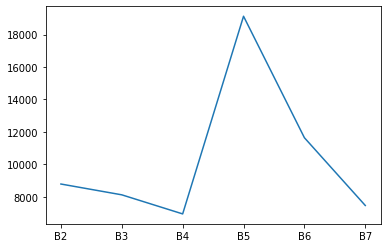

In [ ]:
bands = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7']
img = load_landsat_image('/content/imagens', bands)

cube = stack_img(img, bands)

plt.plot(bands, cube[4010, 4010])

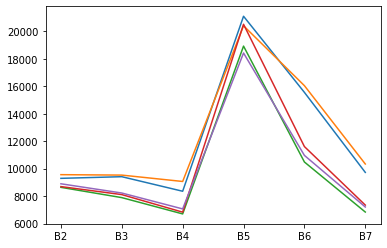

In [ ]:
n_index = np.random.randint(4000, 5000, size=(5))
m_index = np.random.randint(5400, 6400, size=(5))

for i in range(5):
    plt.plot(bands, cube[n_index[i], m_index[i]])

In [ ]:
water_pts = cube[water_mask] / 10000
water_pts.shape

(5549123, 6)

In [ ]:
water_pts[:5]

array([[0.8675, 0.7354, 0.6435, 0.9008, 0.6364, 0.5511],
       [0.8698, 0.7436, 0.6449, 0.947 , 0.6377, 0.5531],
       [0.8679, 0.7395, 0.6429, 0.9283, 0.6382, 0.5509],
       [0.8692, 0.7404, 0.6439, 0.9286, 0.6424, 0.55  ],
       [0.9129, 0.8096, 0.7193, 0.725 , 0.5806, 0.5443]])

In [ ]:
water_pts.mean()

0.9114734658972221

In [ ]:
wls = [0.44, 0.47, 0.56, 0.655, 0.865, 1.61, 2.2]
mean = water_pts.mean(axis=0)
std = water_pts.std(axis=0)
mean.shape, std.shape

((6,), (6,))

ValueError: ignored

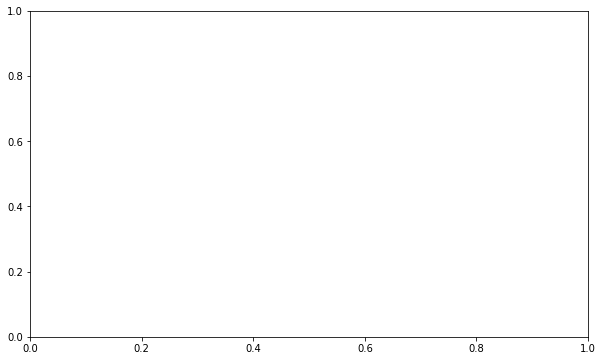

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(wls, mean, label='water')
plt.fill_between(wls, mean-0.5*std, mean+0.5*std, color='blue', alpha=0.1)
plt.legend()
